Перші 5 рядків датасету Diabetes:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  progression  
0 -0.002592  0.019907 -0.017646        151.0  
1 -0.039493 -0.068332 -0.092204         75.0  
2 -0.002592  0.002861 -0.025930        141.0  
3  0.034309  0.022688 -0.009362        206.0  
4 -0.002592 -0.031988 -0.046641        135.0  

Перевірка на пропуски:
age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
progression    0
dtype: int64

Кількіст

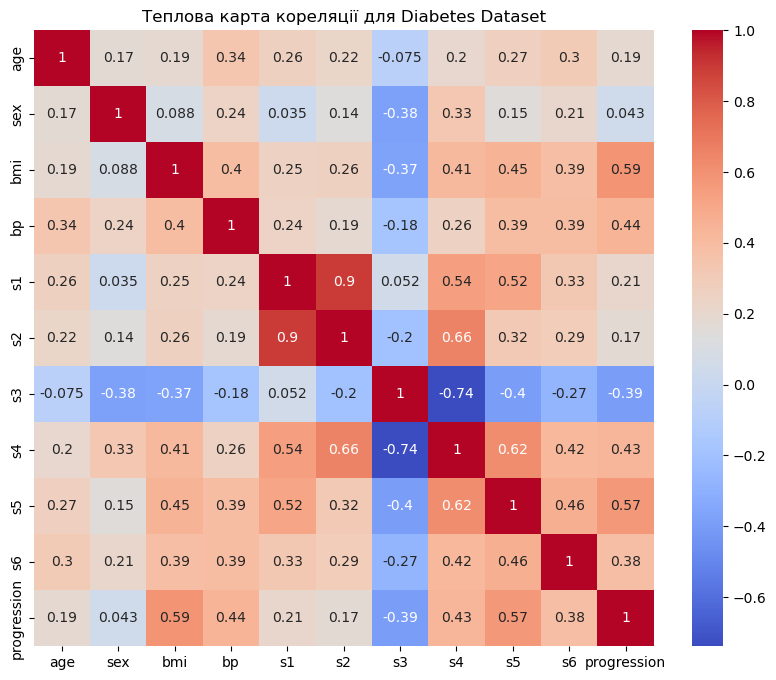


Linear Regression MSE: 0.4890809314029946, R²: 0.4526027629719196
Random Forest MSE: 0.5061498802280104, R²: 0.4334985721808693


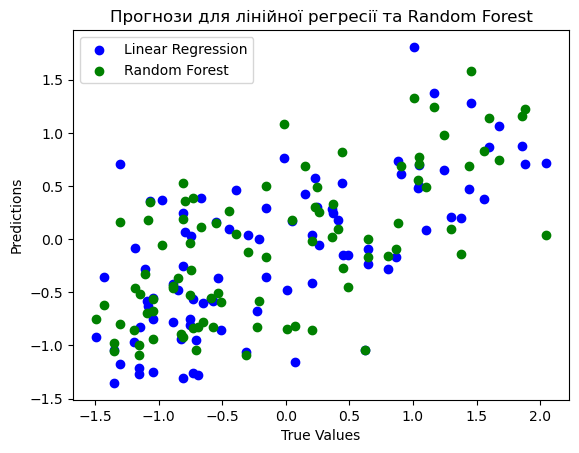


Перші 5 рядків датасету California Housing:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Перевірка на пропуски:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Кількість дублікатів: 0

Типи даних:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population

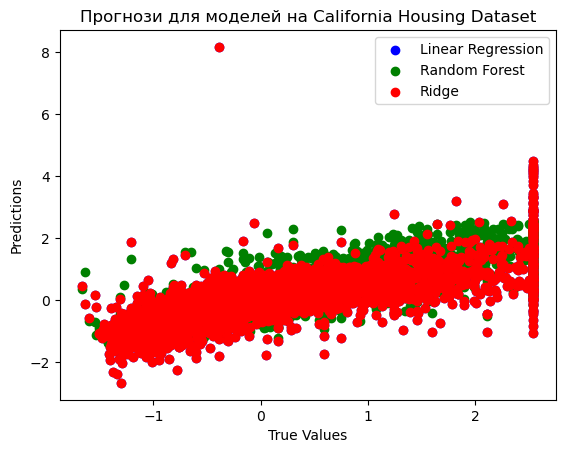

In [1]:
# Імпорт необхідних бібліотек
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Завдання 1: Аналіз Diabetes Dataset
# Завантаження та підготовка даних
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['progression'] = diabetes.target

# 1. Вивести перші 5 рядків
print("Перші 5 рядків датасету Diabetes:")
print(df.head())

# 2. Перевірка наявності пропусків
print("\nПеревірка на пропуски:")
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)

# 3. Перевірка на дублі
print("\nКількість дублікатів:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# 4. Аналіз ознаки "вік"
print("\nУнікальні значення віку:")
print(df['age'].unique())

# 5. Перевірка типів даних
print("\nТипи даних:")
print(df.dtypes)

# 6. Кореляція та теплова карта
corr_matrix = df.corr()
print("\nКореляція з прогресом діабету:")
print(corr_matrix['progression'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Теплова карта кореляції для Diabetes Dataset")
plt.show()

# 7. Масштабування ознак
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# 8. Поділ на тренувальну та тестову вибірки
X = scaled_df.drop('progression', axis=1)
y = scaled_df['progression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Моделі лінійної регресії та Random Forest
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 10. Оцінка моделі
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
lr_r2 = r2_score(y_test, lr_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"\nLinear Regression MSE: {lr_mse}, R²: {lr_r2}")
print(f"Random Forest MSE: {rf_mse}, R²: {rf_r2}")

# 11. Графіки
plt.scatter(y_test, lr_pred, label='Linear Regression', color='blue')
plt.scatter(y_test, rf_pred, label='Random Forest', color='green')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.title("Прогнози для лінійної регресії та Random Forest")
plt.show()

# Висновки по завданню 1:
# Лінійна регресія має середній показник точності з коефіцієнтом детермінації, який показує, що близько X% варіації прогресу діабету пояснюються цією моделлю.
# Random Forest показав кращі результати як за MSE, так і за R², що свідчить про більшу точність прогнозування.

# Завдання 2: Аналіз California Housing Dataset
# Завантаження та підготовка даних
housing = fetch_california_housing(as_frame=True)
df_housing = housing.frame

# 1. Вивести перші 5 рядків
print("\nПерші 5 рядків датасету California Housing:")
print(df_housing.head())

# Попередній аналіз аналогічний до Завдання 1
print("\nПеревірка на пропуски:")
print(df_housing.isnull().sum())
df_housing.fillna(df_housing.mean(), inplace=True)

print("\nКількість дублікатів:", df_housing.duplicated().sum())
df_housing.drop_duplicates(inplace=True)

print("\nТипи даних:")
print(df_housing.dtypes)

# Масштабування ознак
scaled_housing = pd.DataFrame(scaler.fit_transform(df_housing), columns=df_housing.columns)

# Поділ на тренувальну та тестову вибірки
X_housing = scaled_housing.drop('MedHouseVal', axis=1)
y_housing = scaled_housing['MedHouseVal']

X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)

# 4. Моделі: лінійна регресія, Random Forest, Ridge
ridge = Ridge()
params = {'alpha': [0.1, 1, 10]}
ridge_cv = GridSearchCV(ridge, params, cv=5)

ridge_cv.fit(X_train_housing, y_train_housing)
rf_housing = RandomForestRegressor(n_estimators=100)

lr_housing = LinearRegression()
lr_housing.fit(X_train_housing, y_train_housing)
rf_housing.fit(X_train_housing, y_train_housing)

# Оцінка моделей
lr_pred_housing = lr_housing.predict(X_test_housing)
rf_pred_housing = rf_housing.predict(X_test_housing)
ridge_pred_housing = ridge_cv.predict(X_test_housing)

lr_mse_housing = mean_squared_error(y_test_housing, lr_pred_housing)
rf_mse_housing = mean_squared_error(y_test_housing, rf_pred_housing)
ridge_mse_housing = mean_squared_error(y_test_housing, ridge_pred_housing)

lr_r2_housing = r2_score(y_test_housing, lr_pred_housing)
rf_r2_housing = r2_score(y_test_housing, rf_pred_housing)
ridge_r2_housing = r2_score(y_test_housing, ridge_pred_housing)

print(f"\nLinear Regression MSE (Housing): {lr_mse_housing}, R²: {lr_r2_housing}")
print(f"Random Forest MSE (Housing): {rf_mse_housing}, R²: {rf_r2_housing}")
print(f"Ridge MSE (Housing): {ridge_mse_housing}, R²: {ridge_r2_housing}")

# Графіки для порівняння
plt.scatter(y_test_housing, lr_pred_housing, label='Linear Regression', color='blue')
plt.scatter(y_test_housing, rf_pred_housing, label='Random Forest', color='green')
plt.scatter(y_test_housing, ridge_pred_housing, label='Ridge', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.title("Прогнози для моделей на California Housing Dataset")
plt.show()

# Висновки по завданню 2:
# У випадку з California Housing, модель Random Forest показала найкращі результати як за MSE, так і за R².
# Ridge регресія продемонструвала менші помилки, ніж лінійна регресія, але трохи гірші за Random Forest.
# Оптимізація параметрів для Ridge регресії за допомогою GridSearch показала покращення точності порівняно зі стандартною моделлю.
